In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## TASK 1

In [3]:
car = pd.read_csv('CarPricePrediction.csv') # load the data in car

In [4]:
car.head() # top 5 rows of car data set


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car.tail() #last 5 rows of car dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [6]:
car.isnull().sum().sum()  

0

In [33]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
car.info() #information about all columns of car dataset including how many colums contains null value and each colums data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
correlation_matrix = car.corr(numeric_only=True) #numeric_only=True is used to tell that only take numeric data 

In [9]:
correlation_matrix #gives us correlation between all the numeric columns

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<Axes: >

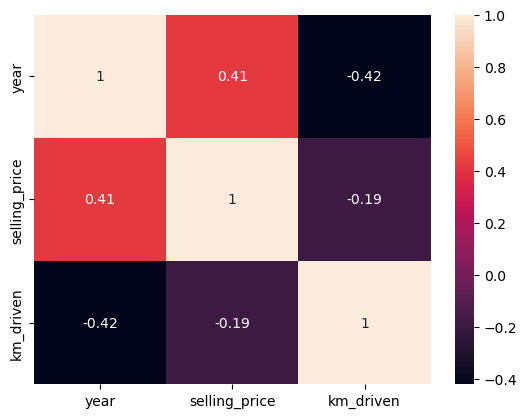

In [10]:
sns.heatmap(correlation_matrix,annot=True)

In [11]:
# heatmap tells us that 
# year and selling_price are weakly positive related
# year and Km_driven are weakly negatively related

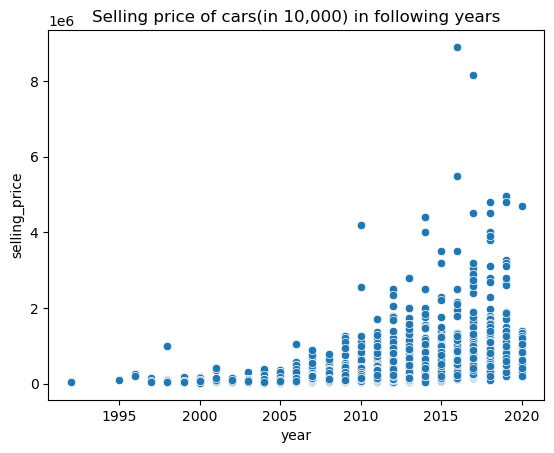

In [12]:
sns.scatterplot(x='year', y='selling_price', data=car)
plt.title('Selling price of cars(in 10,000) in following years')
plt.show()

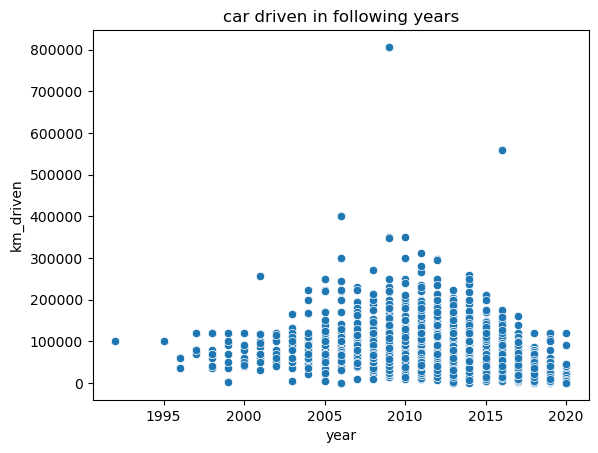

In [13]:
sns.scatterplot(x='year', y='km_driven', data=car)
plt.title('car driven in following years')
plt.show()

In [14]:
car[car['km_driven'] > 800000] ## this car is driven the most amounting 8 lakh 6 six thousand 5 hundred and 99

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner


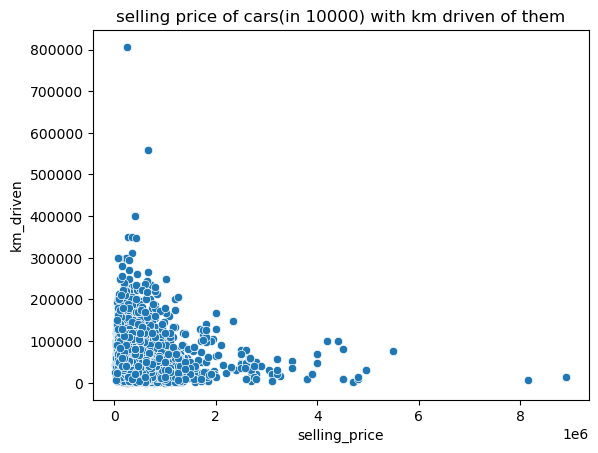

In [15]:
sns.scatterplot(x='selling_price', y='km_driven', data=car)
plt.title('selling price of cars(in 10000) with km driven of them')
plt.show()

## TASK 2

In [16]:
correlation_matrix = car.corr(numeric_only=True)

In [17]:
correlation_matrix

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [18]:
# only the features with numeric data affects the selling_price of car
# as the year is greater (the car is relatively latest) the selling_price is high as the car is not used for that long if year is greater in no.
# as the km_driven increases the car gets more old and runs more so the Selling_price decreases

<Axes: >

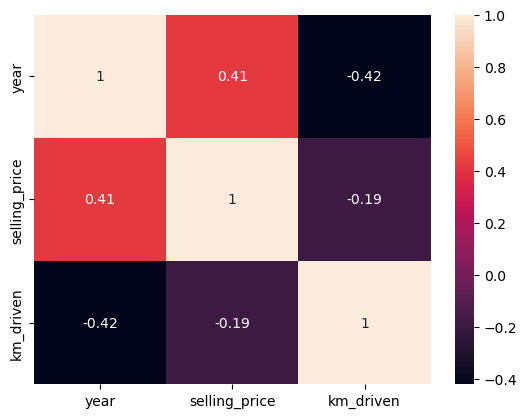

In [19]:
sns.heatmap(correlation_matrix,annot=True)

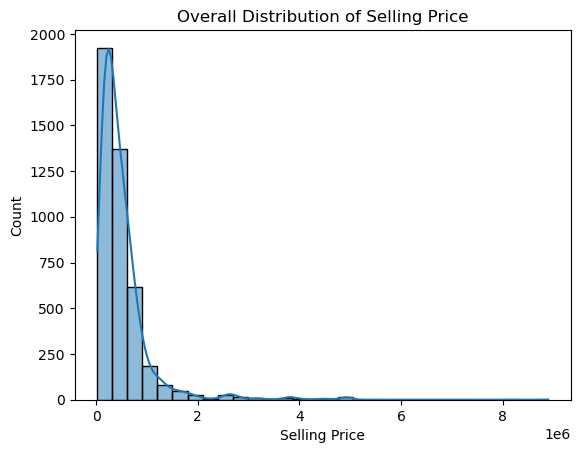

In [20]:
sns.histplot(car['selling_price'], bins=30, kde=True)
plt.title('Overall Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.show()

In [21]:
# most cars are on chepaer side starting from mimimum to 2 lakhs

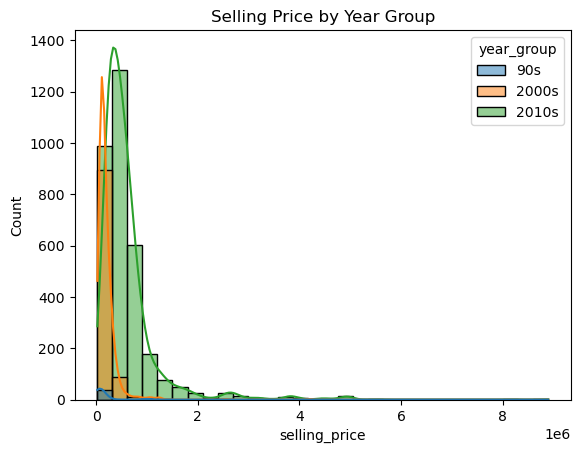

In [22]:
car['year_group'] = pd.cut(car['year'], bins=[1990, 2000, 2010, 2020], labels=['90s', '2000s', '2010s'])

sns.histplot(data=car, x='selling_price', hue='year_group', bins=30, kde=True)
plt.title('Selling Price by Year Group')
plt.show()

In [23]:
# this shows that most car are sold in 2010s 

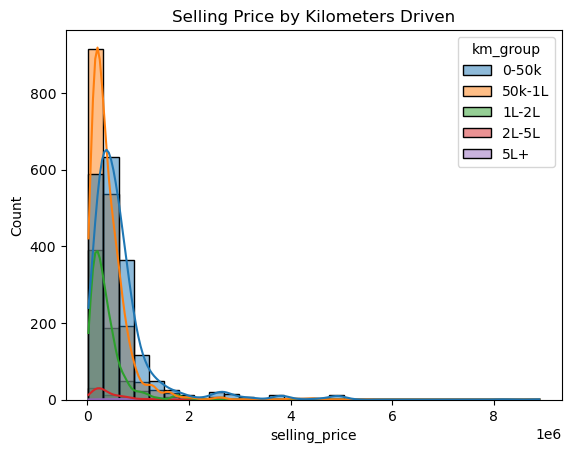

In [24]:
car['km_group'] = pd.cut(car['km_driven'], bins=[0, 50000, 100000, 200000, 500000, 1000000],
                         labels=['0-50k', '50k-1L', '1L-2L', '2L-5L', '5L+'])

sns.histplot(data=car, x='selling_price', hue='km_group', bins=30, kde=True)
plt.title('Selling Price by Kilometers Driven')
plt.show()

In [25]:
# most cars sold are that have km_distance bw 50,000 to 1 lakh 
# the car which sold for higest is driven only upto 50k

## TASK 3

In [26]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'year_group', 'km_group']

car_encoded = pd.get_dummies(car, columns=categorical_cols, drop_first=True)
#encoding

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['year', 'km_driven']  

car_encoded[num_cols] = scaler.fit_transform(car_encoded[num_cols])
#scaling

In [28]:
from sklearn.model_selection import train_test_split
car_encoded = car_encoded.drop('name', axis=1)

X = car_encoded.drop('selling_price', axis=1)
y = car_encoded['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# data split

## TASK 4

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# train

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
y_pred
# predicted data

array([ 5.04507419e+05,  5.57562089e+05,  1.16954540e+05,  4.57215205e+05,
        1.51903359e+06,  1.69068038e+05,  4.35346236e+05,  2.16813921e+05,
        6.89147088e+05,  2.43104311e+05,  6.90627465e+05,  5.88274749e+05,
        6.24018704e+05,  2.34168439e+04,  7.56381426e+05,  4.68525313e+05,
        9.23395196e+05,  1.25944816e+06,  1.35039761e+05,  1.42522506e+06,
        6.62021893e+05,  8.04776650e+05,  4.94819909e+05,  8.26318412e+05,
        4.32000423e+05,  6.42400224e+05,  7.41191464e+05,  1.98737506e+05,
        4.24538112e+05,  5.82335115e+05, -8.14621401e+04,  1.47209973e+06,
        5.66220192e+05,  7.73270025e+05,  5.59716265e+05,  4.00503478e+05,
        8.42474734e+05,  5.05590790e+05,  1.60244863e+05,  5.28209640e+05,
        5.86354655e+05,  5.03975158e+05,  7.61422056e+05,  3.85424245e+05,
        3.40700353e+05,  4.64584137e+05,  3.99494015e+05,  4.68831147e+05,
        7.59501962e+05,  4.03674560e+05,  3.07008320e+05,  2.72932567e+05,
        5.31245941e+05,  

## TASK 5

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f" Mean Absolute Error (MAE): {mae}")
print(f" Mean Squared Error (MSE): {mse}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f" R² Score: {r2}")

 Mean Absolute Error (MAE): 221152.97802995707
 Mean Squared Error (MSE): 181834611353.5805
 Root Mean Squared Error (RMSE): 426420.6976139649
 R² Score: 0.40415361637404257
